In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
# Ses dosyasını yükleme ve özellik çıkarımı
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs, axis=1)


In [3]:
def label_for_file(file_path):
    # Dosya adından dil bilgisini çıkart
    lang = file_path.split('-')[0]  # Dosya adı dil-bilgi-...
    return lang

In [4]:
# Veri setini hazırlama
X = []  #feature 
y = []  # Label

In [5]:
# Ses dosyalarını işleyerek özellikleri çıkarın
file_paths = ["ES-M-1-1.wav", "FR-F-1-9.wav", "GE-M-1-12.wav", "IT-F-1-1.wav", "UK-F-2-11.wav", "US-F-2-9.wav", "US-F-4-1.wav", "US-M-2-3.wav", "US-M-2-7.wav", "US-M-5-9.wav"]
for file_path in file_paths:
    features = extract_features(file_path)
    X.append(features)
    y.append(label_for_file(file_path))  # Dosyaya göre sınıf etiketi

In [6]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Random Forest sınıflandırıcısını oluştur
clf = RandomForestClassifier(random_state=42)

# Sınıflandırma modelini eğitme
clf.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred = clf.predict(X_test)

Sınıflandırma Raporu:
               precision    recall  f1-score   support

          ES       0.00      0.00      0.00         1
          FR       0.00      0.00      0.00         1
          GE       0.00      0.00      0.00         0
          IT       0.00      0.00      0.00         0
          US       0.50      0.33      0.40         3

    accuracy                           0.20         5
   macro avg       0.10      0.07      0.08         5
weighted avg       0.30      0.20      0.24         5



C:\Users\Niyazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niyazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Niyazi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Und

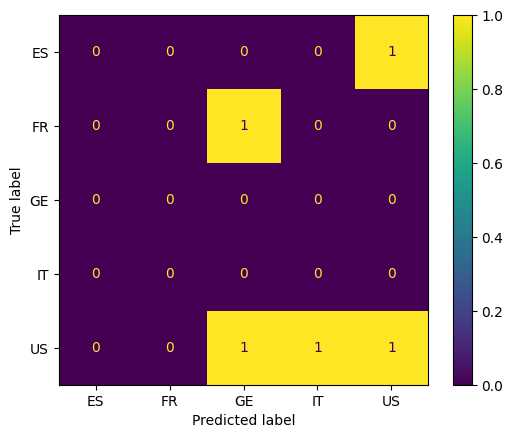

In [7]:
# Sınıflandırma raporunu yazdırma ve ConfusionMatrixDisplay
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()